# Streaming
What we want to achieve here is to keep generating a streaming data that will allows us see in real-time how it is being generated.
We can refactor the code to generate 

In [9]:
import random
import time

def generate_mock_data():
    while True:
        record = {
            'id': random.randint(1, 1000),
            'value': random.random() * 100
            }
        yield record
        time.sleep(1) # Simulate data arriving every 0.5 seconds

In [10]:
def transform_data(record):
    transformed_record = {
        'id': record['id'],
        'value': record['value'],
        'transformed_value': record['value'] * 1.1 # Example transformatio
        }
    return transformed_record

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

buffer = []

def load_data(record):
    buffer.extend([record])
    df = pd.DataFrame(buffer)
    plt.clf()
    df.plot(x='id', y='transformed_value', kind='line', marker='o')
    plt.show()

In [31]:
def process_stream(run_time_seconds):
    start_time = time.time()
    for record in generate_mock_data():
        transformed_record = transform_data(record)
        load_data(transformed_record)
        if time.time() - start_time > run_time_seconds:
            print("Time limit reached. Terminating the stream processing.")
            break

<Figure size 640x480 with 0 Axes>

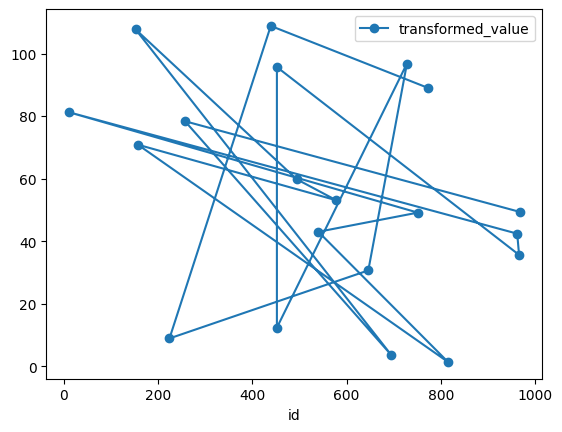

<Figure size 640x480 with 0 Axes>

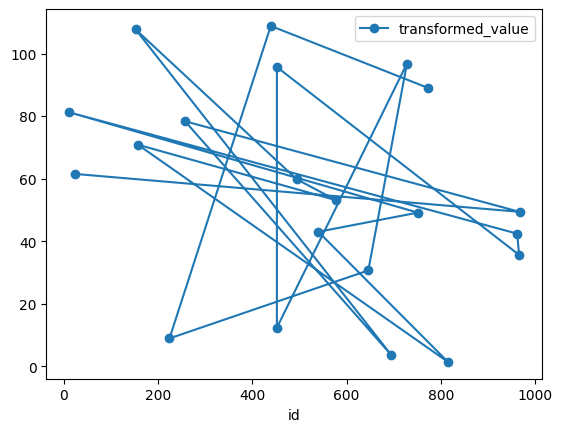

<Figure size 640x480 with 0 Axes>

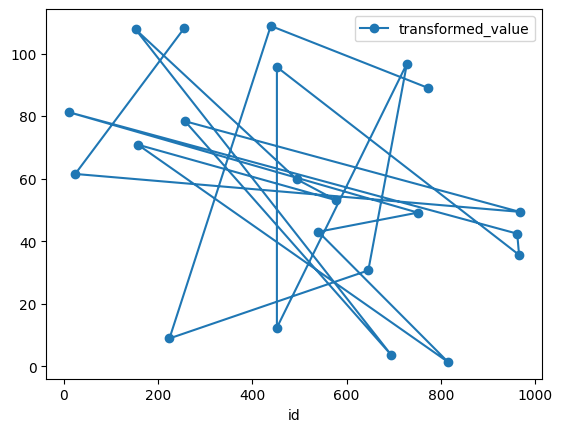

<Figure size 640x480 with 0 Axes>

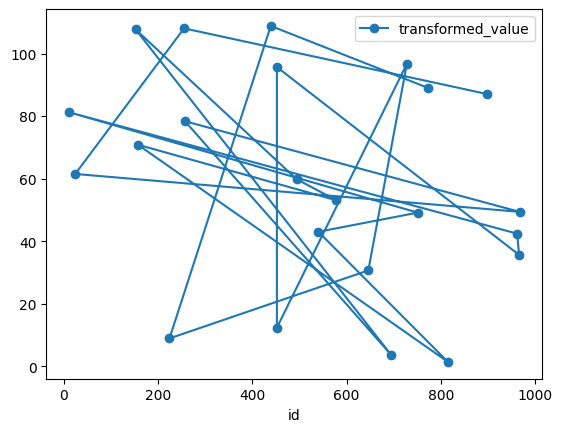

<Figure size 640x480 with 0 Axes>

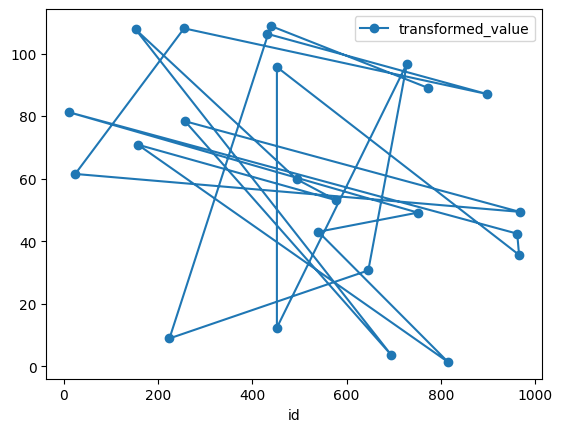

<Figure size 640x480 with 0 Axes>

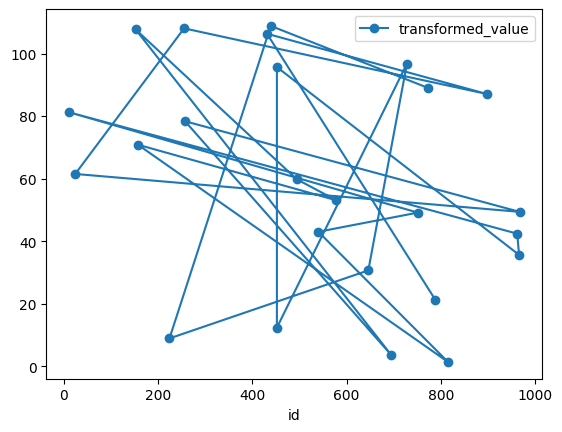

Time limit reached. Terminating the stream processing.


In [33]:
process_stream(5)